## What is in the `Genecorpus-30M` pre-training dataset?

> Note: if you want to run this code, you need to download the full `Genecorpus-30M` dataset. This can take ~15-20 minutes when done using the version Outerbounds staged in S3.

In [78]:
%matplotlib widget
from datasets import load_from_disk
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [79]:
DATA_ROOT = "/home/ob-workspace/data"
PRETRAIN_DATA_PATH = os.path.join(DATA_ROOT, "genecorpus_30M_2048.dataset")
TOKEN_DICTIONARY_FILE = "/home/ob-workspace/data/token_dictionary.pkl" 

In [80]:
dataset = load_from_disk(PRETRAIN_DATA_PATH) # takes a minute on first go

In [81]:
dataset

Dataset({
    features: ['input_ids', 'length'],
    num_rows: 27406216
})

In [82]:
# what is the distribution of lengths of the sequences?
lens = dataset['length']
seq_len, counts = np.unique(lens, return_counts=True)

In [83]:
high_count = seq_len[np.argmax(counts)]
num_occurences = counts[np.argmax(counts)]
print(f"Most common sequence length is {high_count} with {num_occurences} occurences")

Most common sequence length is 2048 with 1880471 occurences


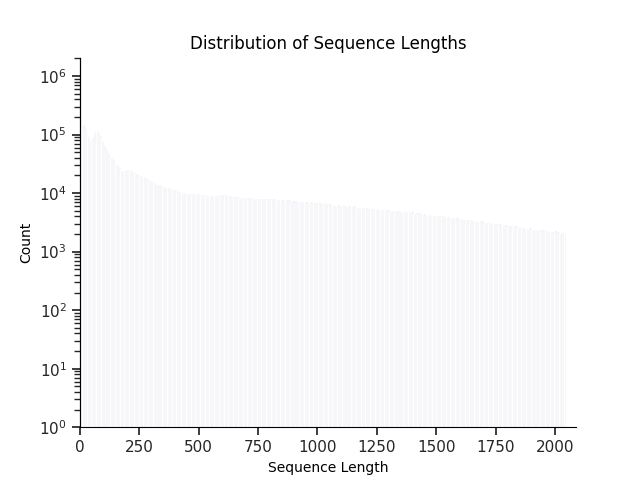

In [84]:
plt.bar(seq_len, counts, color='#9396DA', alpha=0.7)
plt.ylabel('Count')
plt.xlabel('Sequence Length')
plt.title('Distribution of Sequence Lengths')
plt.yscale('log')
plt.ylim(1, np.max(counts) * 1.1)
plt.xlim(0, np.max(seq_len) * 1.02)
plt.gca().spines['top'].set_position(('data',0))
plt.gca().spines['right'].set_position(('data',0))
plt.show();

### Single sample

In [85]:
i = np.random.randint(len(dataset))
sample = dataset[i]

In [86]:
sample['input_ids']

[2382,
 12768,
 16012,
 2478,
 9334,
 7617,
 2983,
 10492,
 2439,
 1009,
 959,
 11123,
 428,
 7921,
 2743,
 16622,
 7644,
 6019,
 6820,
 17168,
 425,
 7436,
 15415,
 14335,
 16308,
 21009,
 7204,
 7291,
 2092,
 5335,
 16829,
 9130,
 4354,
 8416,
 4798,
 5357,
 200,
 14816,
 8345,
 13506,
 1049,
 14377,
 2992,
 6740,
 19968,
 10949,
 3257,
 10057,
 5744,
 3560,
 10517,
 19763,
 2928,
 3039,
 6561,
 3906,
 13466,
 5212,
 1823,
 16979,
 8231,
 19901,
 9215,
 16297,
 1147,
 6206,
 3083,
 4774,
 12820,
 17071,
 7606,
 9940,
 3792,
 7502,
 19999,
 1720,
 11842,
 14125,
 512,
 2257,
 8008,
 11319,
 4435,
 8565,
 15533,
 8208,
 14180,
 12030,
 19823,
 12286,
 8919]

In [87]:
with open(TOKEN_DICTIONARY_FILE, "rb") as f:
    gene_token_dict = pickle.load(f)

token_id_to_ensembl_id_dict = {v: k for k, v in gene_token_dict.items()}
decode_sequence = lambda sequence: list(map(lambda x: token_id_to_ensembl_id_dict[x], sequence))
encoded_sequence = lambda sequence: list(map(lambda x: gene_token_dict[x], sequence))

In [88]:
decode_sequence(sample['input_ids'])

['ENSG00000100804',
 'ENSG00000170619',
 'ENSG00000187583',
 'ENSG00000101255',
 'ENSG00000151287',
 'ENSG00000138381',
 'ENSG00000104886',
 'ENSG00000160908',
 'ENSG00000101132',
 'ENSG00000067334',
 'ENSG00000066044',
 'ENSG00000163950',
 'ENSG00000023318',
 'ENSG00000140403',
 'ENSG00000103035',
 'ENSG00000196684',
 'ENSG00000138592',
 'ENSG00000128609',
 'ENSG00000134242',
 'ENSG00000198604',
 'ENSG00000023191',
 'ENSG00000137486',
 'ENSG00000184840',
 'ENSG00000178952',
 'ENSG00000188906',
 'ENSG00000257103',
 'ENSG00000136240',
 'ENSG00000136770',
 'ENSG00000099331',
 'ENSG00000123146',
 'ENSG00000197448',
 'ENSG00000149187',
 'ENSG00000115091',
 'ENSG00000143742',
 'ENSG00000118418',
 'ENSG00000123358',
 'ENSG00000008018',
 'ENSG00000182117',
 'ENSG00000143384',
 'ENSG00000174021',
 'ENSG00000068697',
 'ENSG00000179144',
 'ENSG00000104904',
 'ENSG00000133661',
 'ENSG00000233276',
 'ENSG00000163466',
 'ENSG00000106153',
 'ENSG00000157514',
 'ENSG00000125968',
 'ENSG00000108654',


### Where do these `Enbsembl IDs` come from?

> Input data is a directory with .loom or .h5ad files containing raw counts from single cell RNAseq data, including all genes detected in the transcriptome without feature selection. 

> Genes should be labeled with Ensembl IDs (loom row attribute "ensembl_id"), which provide a unique identifer.

> Other forms of gene annotations (e.g. gene names) can be converted to Ensembl IDs via Ensembl Biomart.

> If one's data is in other formats besides .loom or .h5ad, one can use the relevant tools (such as Anndata tools) to convert the file to a .loom or .h5ad format prior to running the transcriptome tokenizer.

### What is `.loom` file? How to interact with it in Python?

Go to http://loom.linnarssonlab.org and download one of the datasets. We will use [this dataset](http://loom.linnarssonlab.org/dataset/cellmetadata/Mousebrain.org.level6/L6_Cerebellum_neurons.loom/NrBEoXQGmAGHgEYq2kqi3IExagZjwBYI0R4jkA7AVwBs6UMnt5FZ4lWnUZFtk8VNCEoRGUjHBoKyIlGxMAHDISC8mPgryEtJMnCgBWKLQZNBCthxjyhafD0mjebScEqn6jRx6IB2AE4FI38ANn8MIiNojH9sI2DEMKJA4KNEfDCoVOx5VjyFIiV8eH9ypQUwxCVFbH98ZGTA5KKjDKgghoUso3hWIyVIvMRRuMQWjDClWBNEeIzxTAggA), which contains information from the neurons in a mouse Cerellbum.

In [167]:
dataset_name = "L6_Cerebellum_neurons.loom"
loom_data_dir = os.path.join(DATA_ROOT, "loom")
url = f"http://loom.linnarssonlab.org/clone/Mousebrain.org.level6/{dataset_name}"

gene_median_file = os.path.join(DATA_ROOT, "gene_median_dictionary.pkl")

In [90]:
! wget {url}  -P {loom_data_dir}

--2024-02-22 22:43:40--  http://loom.linnarssonlab.org/clone/Mousebrain.org.level6/L6_Cerebellum_neurons.loom
Resolving loom.linnarssonlab.org (loom.linnarssonlab.org)... 104.197.181.233
Connecting to loom.linnarssonlab.org (loom.linnarssonlab.org)|104.197.181.233|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33162050 (32M) [application/octet-stream]
Saving to: ‘/home/ob-workspace/data/loom/L6_Cerebellum_neurons.loom’

L6_Cerebellum_neuro 100%[===================>]  31.62M  35.7MB/s    in 0.9s    

2024-02-22 22:43:41 (35.7 MB/s) - ‘/home/ob-workspace/data/loom/L6_Cerebellum_neurons.loom’ saved [33162050/33162050]



In [92]:
import loompy 
cerebellum_ds = loompy.connect(os.path.join(loom_data_dir, dataset_name))

In [93]:
cerebellum_ds

,,,,,,,Age,p19,p25,p19,p19,p19,p19,p19,p19,p19,p19,...
,,,,,,,AnalysisPool,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,...
,,,,,,,AnalysisProject,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,...
,,,,,,,Bucket,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,...
,,,,,,,CellConc,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...
,,,,,,,CellID,10X51_2_CTACACTTCTGT-,10X26_1_GTAGGTACCATTCT-1,10X51_1_TGTACTAACGAA-,10X51_2_CAGCCTACCTTT-,10X51_1_ACGAACGTGTAC-,10X51_2_CGACGACGAATC-,10X51_1_CATGGATGAGAA-,10X51_2_CTGAACAGGGTG-,10X51_1_CTGTGATATGCG-,10X51_2_GTCTCTATCTCT-,...
,,,,,,,Cell_Conc,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...
,,,,,,,ChipID,10X51,10X26,10X51,10X51,10X51,10X51,10X51,10X51,10X51,10X51,...
,,,,,,,Class,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,...
,,,,,,,ClassProbability_Astrocyte,0.00040348020393425333,0.001518693376619957,0.0018267146982464135,0.0003828745861629314,7.090697932933566e-05,5.083304863972048e-05,0.0010027636261715211,0.00015985970460372556,9.471525363635919e-05,7.998123822650638e-05,...
,,,,,,,"ClassProbability_Astrocyte,Immune",6.211679582375215e-05,0.0003892930401951819,0.0004554466604949278,2.0666990497478276e-05,1.2494519647877916e-05,8.11979365764723e-06,0.00015790625172115054,3.531034693821392e-05,9.562787177894012e-06,7.783286271736645e-06,...


#### What is in the rows and columns?

In [152]:
cerebellum_ds[0:10, :]

array([[ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 5.,  6., 48., ...,  0.,  0.,  0.],
       [ 4.,  7.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 3., 10., 23., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  2.,  3., ...,  0.,  1.,  0.]], dtype=float32)

In [97]:
gene_names = cerebellum_ds.ra["Gene"]
gene_names[:5]

array(['Plxdc1', 'Itpr1', 'Col18a1', 'Calb1', 'Car8'], dtype=object)

In [96]:
cerebellum_ds.ca.keys()[:5]

['Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc']

# TODO: WHY TOKENIZER NOT WORKING?

#### Save the data so it can be used with the `geneformer.TranscriptomeTokenizer`

| *Required format:* raw counts scRNAseq data without feature selection as .loom or anndata file.

| *Required row (gene) attribute:* "ensembl_id"; Ensembl ID for each gene.

| *Required col (cell) attribute:* "n_counts"; total read counts in that cell.

In [98]:
gene_acession = cerebellum_ds.ra['Accession'] # ensembl ids
# rename to avoid - AttributeError: '<class 'loompy.attribute_manager.AttributeManager'>' object has no attribute 'ensembl_id'
cerebellum_ds.ra['ensembl_id'] = gene_acession # rewrites loom DB in place

In [133]:
# add ensembl_id to the tokenization dictionary
def add_ensembl_id_to_token_dict(token_dict, ensembl_id):
    token_dict[ensembl_id] = len(token_dict)
    return token_dict

extended_token_dict = gene_token_dict.copy()
for i, ensembl_id in enumerate(cerebellum_ds.ra['ensembl_id']):
    extended_token_dict[ensembl_id] = len(extended_token_dict)

for i, ensembl_id in enumerate(cerebellum_ds.ra['ensembl_id']):
    assert ensembl_id in extended_token_dict.keys()

In [137]:
# save new token dictionary
my_token_dict = "/home/ob-workspace/data/extended_token_dictionary.pkl"
with open(my_token_dict, "wb") as f:
    pickle.dump(extended_token_dict, f)

In [153]:
with open(my_token_dict, "rb") as f:
    _token_dict = pickle.load(f)

In [158]:
list(_token_dict.keys())[-10:]

['ENSMUSG00000032033',
 'ENSMUSG00000032026',
 'ENSMUSG00000042793',
 'ENSMUSG00000070473',
 'ENSMUSG00000027635',
 'ENSMUSG00000042759',
 'ENSMUSG00000086587',
 'ENSMUSG00000016028',
 'ENSMUSG00000027669',
 'ENSMUSG00000024974']

In [138]:
import re
pattern = re.compile(r'\d+')
res = [''.join(pattern.findall(x)) for x in cerebellum_ds.ca['Number of Reads']]
assert len(res) == cerebellum_ds.shape[1]

def str_to_num(s):
    if s == '':
        return 0
    return int(s)

res = list(map(str_to_num, res))

In [126]:
cerebellum_ds.ca['n_counts'] = res

### How to tokenize our `.loom` data sample?

In [139]:
from geneformer import TranscriptomeTokenizer

In [140]:
tokenized_rna_seq_dir = os.path.join(DATA_ROOT, "tokenized_rna_seq")

In [141]:
tk = TranscriptomeTokenizer(token_dictionary_file=my_token_dict)
tk.tokenize_data(loom_data_dir, tokenized_rna_seq_dir, "cerebellum_neurons", file_format="loom")

Tokenizing /home/ob-workspace/data/loom/L6_Cerebellum_neurons.loom
/home/ob-workspace/data/loom/L6_Cerebellum_neurons.loom has no column attribute 'filter_pass'; tokenizing all cells.
Creating dataset.


Map:   0%|          | 0/5292 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5292 [00:00<?, ? examples/s]

In [142]:
tokenized_cerebellum_dataset = load_from_disk(os.path.join(tokenized_rna_seq_dir, "cerebellum_neurons.dataset"))

# TEST

In [165]:
data = loompy.connect(os.path.join(loom_data_dir, "L6_Cerebellum_neurons.loom"))

In [ ]:
with open(gene_median_file, "rb") as f:
    gene_median_dict = pickle.load(f)
gene_keys = list(gene_median_dict.keys())

In [166]:
data.ra["ensembl_id"]

array(['ENSMUSG00000017417', 'ENSMUSG00000030102', 'ENSMUSG00000001435',
       ..., 'ENSMUSG00000016028', 'ENSMUSG00000027669',
       'ENSMUSG00000024974'], dtype=object)

In [ ]:

    # if self.custom_attr_name_dict is not None:
    #     file_cell_metadata = {
    #         attr_key: [] for attr_key in self.custom_attr_name_dict.keys()
    #     }

    with lp.connect(str(loom_file_path)) as data:
        # define coordinates of detected protein-coding or miRNA genes and vector of their normalization factors
        coding_miRNA_loc = np.where(
            [self.genelist_dict.get(i, False) for i in data.ra["ensembl_id"]]
        )[0]
        norm_factor_vector = np.array(
            [
                self.gene_median_dict[i]
                for i in data.ra["ensembl_id"][coding_miRNA_loc]
            ]
        )
        coding_miRNA_ids = data.ra["ensembl_id"][coding_miRNA_loc]
        coding_miRNA_tokens = np.array(
            [self.gene_token_dict[i] for i in coding_miRNA_ids]
        )

        # define coordinates of cells passing filters for inclusion (e.g. QC)
        try:
            data.ca["filter_pass"]
        except AttributeError:
            var_exists = False
        else:
            var_exists = True

        if var_exists:
            filter_pass_loc = np.where([i == 1 for i in data.ca["filter_pass"]])[0]
        elif not var_exists:
            print(
                f"{loom_file_path} has no column attribute 'filter_pass'; tokenizing all cells."
            )
            filter_pass_loc = np.array([i for i in range(data.shape[1])])

        # scan through .loom files and tokenize cells
        tokenized_cells = []
        for _ix, _selection, view in data.scan(
            items=filter_pass_loc, axis=1, batch_size=self.chunk_size
        ):
            # select subview with protein-coding and miRNA genes
            subview = view.view[coding_miRNA_loc, :]

            # normalize by total counts per cell and multiply by 10,000 to allocate bits to precision
            # and normalize by gene normalization factors
            subview_norm_array = (
                subview[:, :]
                / subview.ca.n_counts
                * target_sum
                / norm_factor_vector[:, None]
            )
            # tokenize subview gene vectors
            tokenized_cells += [
                tokenize_cell(subview_norm_array[:, i], coding_miRNA_tokens)
                for i in range(subview_norm_array.shape[1])
            ]

            # add custom attributes for subview to dict
            if self.custom_attr_name_dict is not None:
                for k in file_cell_metadata.keys():
                    file_cell_metadata[k] += subview.ca[k].tolist()
            else:
                file_cell_metadata = None

In [143]:
tokenized_cerebellum_dataset

Dataset({
    features: ['input_ids', 'length'],
    num_rows: 5292
})

In [160]:
tokenized_cerebellum_dataset

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## What is happening during pre-training?

## How do downstream tasks relate to the pre-trained Geneformer?

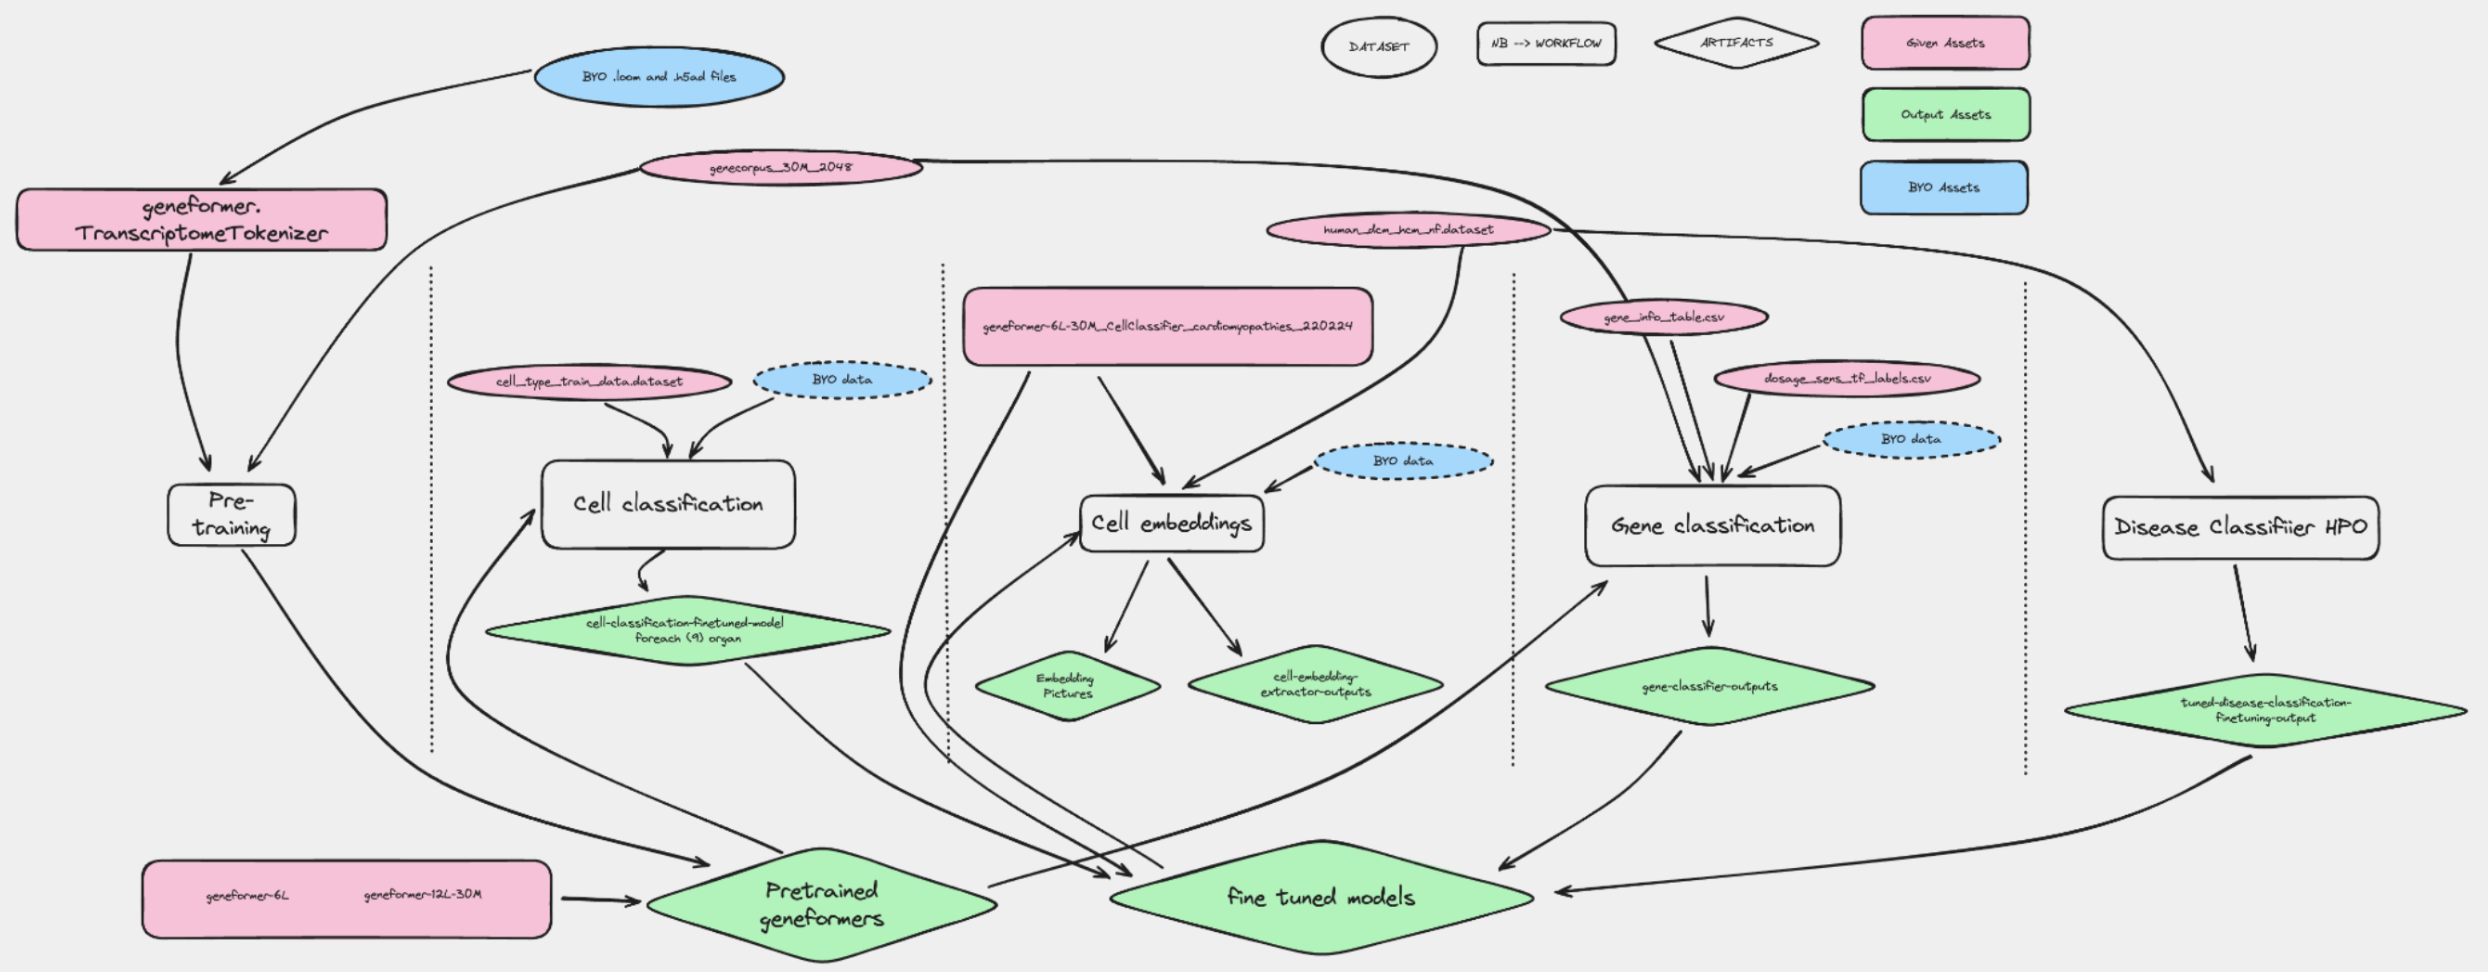